#### Import libraries and set paths
Begin by importing any libraries we may need. I also like to add the file path right at the top so that if paths change, we can quickly change it right at the top of the file.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Get Aggregated Film Data
Read in aggregated film data to a dataframe using the path we used above.

In [6]:
df = pd.read_csv('../.csv/.etl_csvs/chungus_with_tmdb.csv', index_col=0)

#### Add a Feature for Day of the Year
Use DatetimeIndex to create a day of year column in our df.

In [7]:
df['day_of_year'] = pd.DatetimeIndex(df['release_date_tmdb']).dayofyear

#### Reset the Index to Feed in to Seaborn
We flatten the dataframe here to prepare for using in Seaborn methods

In [8]:
df_day_of_year = df['day_of_year'].value_counts().rename_axis('day_of_year').reset_index(name='total')
df_day_of_year

,day_of_year,total
0,1.0,943
1,274.0,143
2,70.0,137
3,69.0,130
4,305.0,120
...,...,...
361,332.0,12
362,186.0,12
363,362.0,12
364,361.0,11


#### Remove anomolous first row
The first row is nearly 10 times the other values of other rows and appears to be a coding convention to default to January 1st where no value is found. Therefore, we will remove it

In [6]:
df_day_of_year.drop(0, inplace=True)
df_day_of_year

,day_of_year,total
1,274.0,143
2,70.0,137
3,69.0,130
4,305.0,120
5,111.0,119
...,...,...
361,332.0,12
362,186.0,12
363,362.0,12
364,361.0,11


#### Create Seaborn Non-Linear Curve Plot
Using a non-linear curve function with order of 4, we find a fairly compelling shape with two peaks and a trough. This illustrates that, for one reason or another, films are being released at 

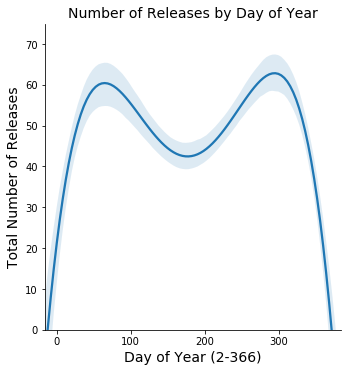

In [7]:
lm = sns.lmplot(x="day_of_year", y="total", data=df_day_of_year, fit_reg=True, order=4, scatter_kws={"s": 0})
axes = lm.axes
plt.title('Number of Releases by Day of Year', fontsize=14)
plt.xlabel("Day of Year (2-366)", fontsize=14)
plt.ylabel("Total Number of Releases", fontsize=14)
axes[0,0].set_ylim(0,75)
sns.set_context('notebook')